# Final Project Phase1

In [6]:
%matplotlib inline

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [8]:
#Import file
data=pd.read_csv('c:\\Users\\ekava\\.spyder-py3\\Breast-Cancer-Wisconsin.csv')

In [9]:
#Verify data imported
data.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
#Convert to DataFrame
BC_Data=pd.DataFrame(data)

In [11]:
#Verify column values
BC_Data.columns.values

array(['Scn', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'CLASS'], dtype=object)

In [12]:
#Isolate column A7 and replace ? with Nan
BC_Data.A7=BC_Data.A7.replace('?',np.NaN)

In [13]:
#Change column to numeric
BC_Data.A7=pd.to_numeric(BC_Data.A7)

In [14]:
#Report how many NaN values
isnull=BC_Data.isnull().sum()
print('There are', isnull.A7 ,"NaN occurences.")

There are 16 NaN occurences.


In [15]:
BC_Data=BC_Data.fillna(round(BC_Data.mean(skipna=True),2))

### Summary Statistics

In [16]:
BC_Data.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544549,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [17]:
shape=BC_Data.shape

In [18]:
print('This DataFrame has',shape[0],'rows, and ',shape[1],'columns.')

This DataFrame has 699 rows, and  11 columns.


In [19]:
print('There are',len(BC_Data.Scn.unique()), 'unique ID values.')

There are 645 unique ID values.


### Histograms of columns A2-A10

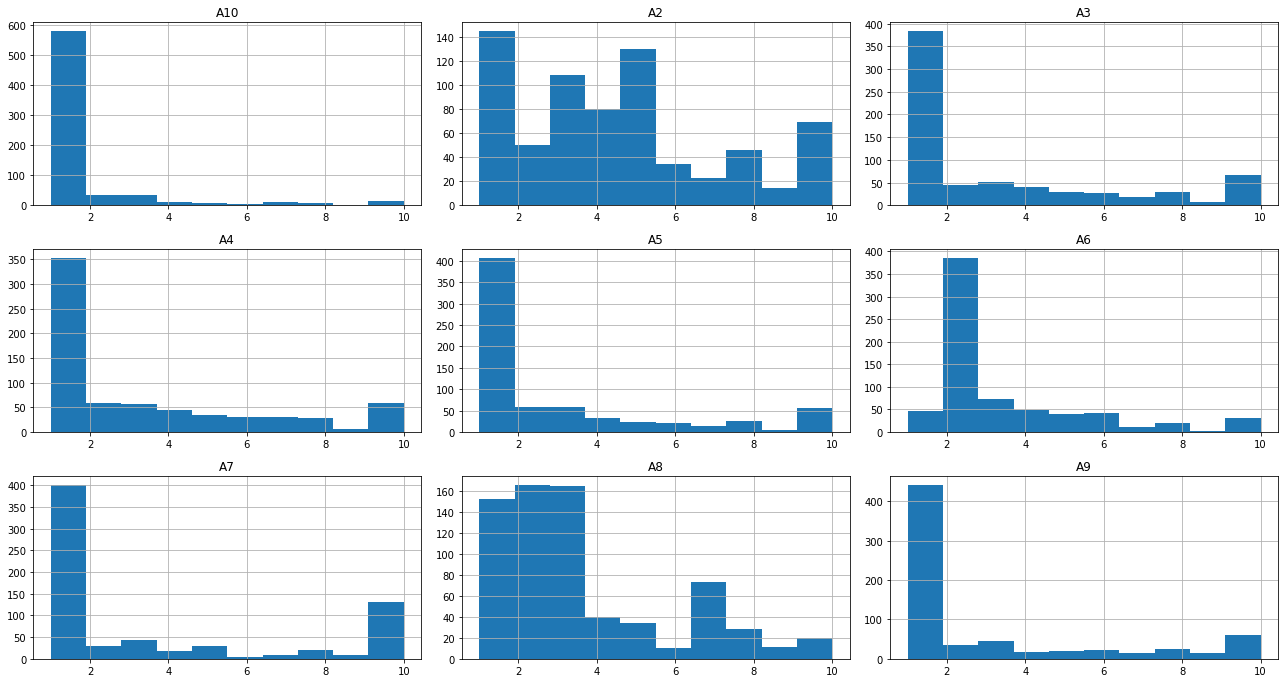

In [20]:
BC_Data[['A2','A3','A4','A5','A6','A7','A8','A9','A10']].hist(bins=10,figsize=(15,8))
plt.tight_layout(rect=(0, 0, 1.2, 1.2))


### Bar Graph of Tumor type occurences

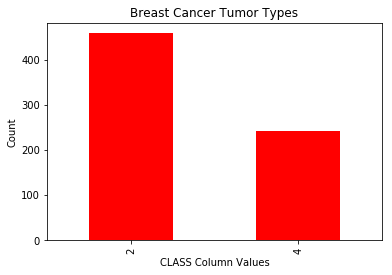

In [21]:
BC_bar=BC_Data['CLASS'].value_counts()
BC_bar.plot(kind='bar',color='r',)
plt.ylabel('Count')
plt.xlabel('CLASS Column Values')
plt.title('Breast Cancer Tumor Types')

### Scatter Plot and Labels

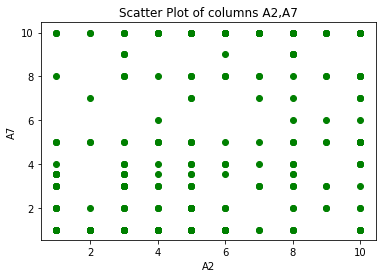

In [22]:
A2=BC_Data['A2']
A7=BC_Data['A7']
plt.scatter(A2,A7,color='g')
plt.title('Scatter Plot of columns A2,A7')
plt.xlabel('A2')
plt.ylabel('A7')


# Final Project Phase 2

In [23]:
from sklearn.cluster import KMeans

In [44]:
#Kmeans columns A2-A10, create and fit. Find and print centroids
samples=BC_Data[['A2','A3','A4','A5','A6','A7','A8','A9','A10']]
model=KMeans(n_clusters=4)
model.fit(samples)
labels=model.predict(samples)
centroids=model.cluster_centers_
print(centroids)

[[ 2.94493392  1.24449339  1.36563877  1.29295154  2.03964758  1.35127753
   2.06167401  1.20044053  1.07709251]
 [ 6.7625      8.3875      8.425       7.75        6.775       9.2125
   7.375       7.7375      3.7875    ]
 [ 7.23404255  4.85106383  5.04255319  4.86170213  4.11702128  9.38297872
   5.26595745  3.78723404  1.64893617]
 [ 7.46478873  7.02816901  6.67605634  4.1971831   5.53521127  3.45295775
   5.38028169  6.81690141  2.30985915]]


### Find optimal number of clusters


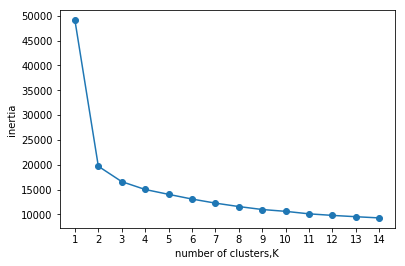

In [45]:
#calculate inertia
ks=range(1,15)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)
    
#Plot inertias
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters,K')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


###### The optimal number of clusters is 2

### Revise data variation

A2     2.815741
A3     3.051459
A4     2.971913
A5     2.855379
A6     2.214300
A7     3.601852
A8     2.438364
A9     3.053634
A10    1.715078
dtype: float64


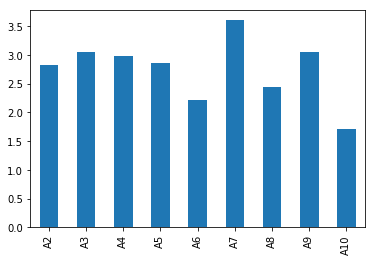

In [47]:
#apply standard deviation functions to columns A2-A10
std_dev=samples.std()
print(samples.std())
std_dev.plot(kind='bar')

##### Column A7 has the most variation

### Implement normalization

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [38]:
scaler=StandardScaler()
kmeans=KMeans(n_clusters=2)
pipeline=make_pipeline(scaler,kmeans)
pipeline.fit(samples)
labels=pipeline.predict(samples)
centroids=kmeans.cluster_centers_
print(centroids)

[[-0.48318495 -0.60457951 -0.60178763 -0.52146029 -0.5242375  -0.59110987
  -0.55114912 -0.53484069]
 [ 0.95403327  1.19372295  1.18821047  1.0296067   1.03509022  1.16712757
   1.08822634  1.05602587]]
